In [ ]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [ ]:
sns.__version__

'0.12.2'

In [ ]:
# Target search for breast cancer
t = new_client.target
query = t.search('aromatase')
targets = pd.DataFrame.from_dict(query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P11511', 'xref_name': None, 'xre...",Homo sapiens,Cytochrome P450 19A1,20.0,False,CHEMBL1978,"[{'accession': 'P11511', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'P22443', 'xref_name': None, 'xre...",Rattus norvegicus,Cytochrome P450 19A1,20.0,False,CHEMBL3859,"[{'accession': 'P22443', 'component_descriptio...",SINGLE PROTEIN,10116


In [ ]:
target = targets.target_chembl_id[0]
target

'CHEMBL1978'

In [ ]:
#Retrive bioactivityy data according to IC50 value
activity = new_client.activity
res = activity.filter(target_chembl_id=target).filter(standard_type="IC50")

In [ ]:
df = pd.DataFrame.from_dict(res)
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,None,24377182,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5037521,Inhibition of human aromatase assessed as redu...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,3.24
2922,None,24377183,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5037521,Inhibition of human aromatase assessed as redu...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.052000000000000005
2923,None,24377184,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5037521,Inhibition of human aromatase assessed as redu...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.063
2924,None,24377185,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5037521,Inhibition of human aromatase assessed as redu...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,10.0


In [ ]:
df.to_csv('bioactivity_data_raw.csv', index=False)

In [ ]:
#Drop missing data
df2 = df[df.standard_value.notna()]
df2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,None,24377182,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5037521,Inhibition of human aromatase assessed as redu...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,3.24
2922,None,24377183,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5037521,Inhibition of human aromatase assessed as redu...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.052000000000000005
2923,None,24377184,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5037521,Inhibition of human aromatase assessed as redu...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.063
2924,None,24377185,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5037521,Inhibition of human aromatase assessed as redu...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,10.0


Data Preprocessing

In [ ]:
#Labeling compound among active, inactive, intermediate
bioactivity_class = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

In [ ]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0
...,...,...,...
2921,CHEMBL5092843,CC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,3240.0
2922,CHEMBL5074047,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,52.0
2923,CHEMBL5081446,CC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,63.0
2924,CHEMBL1093458,CC/C(=C(\c1ccc(O)cc1)c1ccc(OCCNC)cc1)c1ccccc1,10000.0


In [ ]:
df3.to_csv('bioactivity_data_3_column.csv', index=False)

In [ ]:
df4 = pd.read_csv("bioactivity_data_3_column.csv")

In [ ]:
bioactivity_class = pd.Series(bioactivity_class, name='bioactivity_class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active
...,...,...,...,...
2845,CHEMBL5092843,CC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,3240.0,intermediate
2846,CHEMBL5074047,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,52.0,active
2847,CHEMBL5081446,CC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,63.0,active
2848,CHEMBL1093458,CC/C(=C(\c1ccc(O)cc1)c1ccc(OCCNC)cc1)c1ccccc1,10000.0,inactive


In [ ]:
df5.to_csv('bioactivity_data_preprocessed.csv', index=False)

In [ ]:
#Install conda and RDkit
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-03-24 13:11:46--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.3’

Miniconda3-py37_4.8 100%[===================>]  81.12M   162MB/s    in 0.5s    

2023-03-24 13:11:46 (162 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.3’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
 

In [ ]:
df6 = pd.read_csv('bioactivity_data_preprocessed.csv')
df6

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active
...,...,...,...,...
2845,CHEMBL5092843,CC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,3240.0,intermediate
2846,CHEMBL5074047,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,52.0,active
2847,CHEMBL5081446,CC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,63.0,active
2848,CHEMBL1093458,CC/C(=C(\c1ccc(O)cc1)c1ccc(OCCNC)cc1)c1ccccc1,10000.0,inactive


In [ ]:
df_no_smiles = df6.drop(columns='canonical_smiles')

In [ ]:
smiles = []

for i in df6.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,bioactivity_class,canonical_smiles
0,CHEMBL341591,7100.0,intermediate,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12
1,CHEMBL2111947,50000.0,inactive,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...
2,CHEMBL431859,238.0,active,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21
3,CHEMBL113637,57.0,active,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21
4,CHEMBL112021,54.0,active,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21
...,...,...,...,...
2845,CHEMBL5092843,3240.0,intermediate,CC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1
2846,CHEMBL5074047,52.0,active,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1
2847,CHEMBL5081446,63.0,active,CC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1
2848,CHEMBL1093458,10000.0,inactive,CC/C(=C(\c1ccc(O)cc1)c1ccc(OCCNC)cc1)c1ccccc1


In [ ]:
df_clean = df_clean_smiles.index[df_clean_smiles["standard_value"] == 0].tolist()
df7 = df_clean_smiles.drop(df_clean_smiles.index[df_clean])
df7

,molecule_chembl_id,standard_value,bioactivity_class,canonical_smiles
0,CHEMBL341591,7100.0,intermediate,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12
1,CHEMBL2111947,50000.0,inactive,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...
2,CHEMBL431859,238.0,active,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21
3,CHEMBL113637,57.0,active,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21
4,CHEMBL112021,54.0,active,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21
...,...,...,...,...
2845,CHEMBL5092843,3240.0,intermediate,CC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1
2846,CHEMBL5074047,52.0,active,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1
2847,CHEMBL5081446,63.0,active,CC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1
2848,CHEMBL1093458,10000.0,inactive,CC/C(=C(\c1ccc(O)cc1)c1ccc(OCCNC)cc1)c1ccccc1


Lipinski Descriptor

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
lipinski_df = lipinski(df7.canonical_smiles)
lipinski_df

,MW,LogP,NumHDonors,NumHAcceptors
0,329.528,4.28820,2.0,2.0
1,315.501,3.89810,2.0,2.0
2,412.306,5.70542,0.0,3.0
3,319.383,4.63450,0.0,3.0
4,321.811,4.58780,0.0,3.0
...,...,...,...,...
2844,331.415,4.94740,2.0,3.0
2845,334.419,4.66560,3.0,3.0
2846,320.392,4.27550,3.0,3.0
2847,373.496,5.35950,2.0,3.0


In [ ]:
df7

,molecule_chembl_id,standard_value,bioactivity_class,canonical_smiles
0,CHEMBL341591,7100.0,intermediate,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12
1,CHEMBL2111947,50000.0,inactive,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...
2,CHEMBL431859,238.0,active,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21
3,CHEMBL113637,57.0,active,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21
4,CHEMBL112021,54.0,active,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21
...,...,...,...,...
2845,CHEMBL5092843,3240.0,intermediate,CC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1
2846,CHEMBL5074047,52.0,active,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1
2847,CHEMBL5081446,63.0,active,CC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1
2848,CHEMBL1093458,10000.0,inactive,CC/C(=C(\c1ccc(O)cc1)c1ccc(OCCNC)cc1)c1ccccc1


In [ ]:
df7.to_csv('bioactivity_data_Preprocess2.csv', index=False)

In [ ]:
df8 = pd.read_csv("bioactivity_data_Preprocess2.csv")

In [ ]:
df_combined = pd.concat([df8,lipinski_df], axis=1)
df_combined

,molecule_chembl_id,standard_value,bioactivity_class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL341591,7100.0,intermediate,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,329.528,4.28820,2.0,2.0
1,CHEMBL2111947,50000.0,inactive,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,315.501,3.89810,2.0,2.0
2,CHEMBL431859,238.0,active,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,412.306,5.70542,0.0,3.0
3,CHEMBL113637,57.0,active,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,319.383,4.63450,0.0,3.0
4,CHEMBL112021,54.0,active,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,321.811,4.58780,0.0,3.0
...,...,...,...,...,...,...,...,...
2844,CHEMBL5092843,3240.0,intermediate,CC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,331.415,4.94740,2.0,3.0
2845,CHEMBL5074047,52.0,active,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,334.419,4.66560,3.0,3.0
2846,CHEMBL5081446,63.0,active,CC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,320.392,4.27550,3.0,3.0
2847,CHEMBL1093458,10000.0,inactive,CC/C(=C(\c1ccc(O)cc1)c1ccc(OCCNC)cc1)c1ccccc1,373.496,5.35950,2.0,3.0


In [ ]:
df_combined.head(50)

,molecule_chembl_id,standard_value,bioactivity_class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL341591,7100.0,intermediate,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,329.528,4.28820,2.0,2.0
1,CHEMBL2111947,50000.0,inactive,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,315.501,3.89810,2.0,2.0
2,CHEMBL431859,238.0,active,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,412.306,5.70542,0.0,3.0
3,CHEMBL113637,57.0,active,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,319.383,4.63450,0.0,3.0
4,CHEMBL112021,54.0,active,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,321.811,4.58780,0.0,3.0
5,CHEMBL324070,5400.0,intermediate,Cc1ccc(S(=O)(=O)n2cc(C(c3ccccc3)n3ccnc3)c3cccc...,427.529,5.02092,0.0,5.0
6,CHEMBL41761,41.0,active,CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21,319.383,4.63450,0.0,3.0
7,CHEMBL111868,78.5,active,Cn1cc(C(c2ccc(F)cc2)n2ccnc2)c2cc(Br)ccc21,384.252,4.91410,0.0,3.0
8,CHEMBL111888,51.8,active,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2cc(Br)ccc21,398.279,5.39700,0.0,3.0
9,CHEMBL112074,205.0,active,CCn1ccc2cc(C(c3ccccc3)n3ccnc3)ccc21,301.393,4.49540,0.0,3.0


In [ ]:
#Convert IC50 to pIC50
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [ ]:
df_combined.standard_value.describe()

count    2.849000e+03
mean     2.204856e+10
std      7.287216e+11
min      4.000000e-03
25%      1.060000e+02
50%      1.070000e+03
75%      7.500000e+03
max      3.388442e+13
Name: standard_value, dtype: float64

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [ ]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,bioactivity_class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL341591,intermediate,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,329.528,4.28820,2.0,2.0,7100.0
1,CHEMBL2111947,inactive,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,315.501,3.89810,2.0,2.0,50000.0
2,CHEMBL431859,active,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,412.306,5.70542,0.0,3.0,238.0
3,CHEMBL113637,active,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,319.383,4.63450,0.0,3.0,57.0
4,CHEMBL112021,active,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,321.811,4.58780,0.0,3.0,54.0
...,...,...,...,...,...,...,...,...
2844,CHEMBL5092843,intermediate,CC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,331.415,4.94740,2.0,3.0,3240.0
2845,CHEMBL5074047,active,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,334.419,4.66560,3.0,3.0,52.0
2846,CHEMBL5081446,active,CC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,320.392,4.27550,3.0,3.0,63.0
2847,CHEMBL1093458,inactive,CC/C(=C(\c1ccc(O)cc1)c1ccc(OCCNC)cc1)c1ccccc1,373.496,5.35950,2.0,3.0,10000.0


In [ ]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,bioactivity_class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL341591,intermediate,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,329.528,4.28820,2.0,2.0,5.148742
1,CHEMBL2111947,inactive,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,active,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,active,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,active,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,321.811,4.58780,0.0,3.0,7.267606
...,...,...,...,...,...,...,...,...
2844,CHEMBL5092843,intermediate,CC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,331.415,4.94740,2.0,3.0,5.489455
2845,CHEMBL5074047,active,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,334.419,4.66560,3.0,3.0,7.283997
2846,CHEMBL5081446,active,CC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,320.392,4.27550,3.0,3.0,7.200659
2847,CHEMBL1093458,inactive,CC/C(=C(\c1ccc(O)cc1)c1ccc(OCCNC)cc1)c1ccccc1,373.496,5.35950,2.0,3.0,5.000000


In [ ]:
df_final.pIC50.describe()

count    2849.000000
mean        6.057253
std         1.384334
min         1.000000
25%         5.124939
50%         5.970616
75%         6.974694
max        11.397940
Name: pIC50, dtype: float64

In [ ]:
df_final.to_csv('bioactivity_data_preprocessed_pIC50.csv')

In [ ]:
df_2class = df_final[df_final['bioactivity_class'] != 'intermediate']
df_2class

,molecule_chembl_id,bioactivity_class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL2111947,inactive,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,active,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,active,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,active,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,321.811,4.58780,0.0,3.0,7.267606
6,CHEMBL41761,active,CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21,319.383,4.63450,0.0,3.0,7.387216
...,...,...,...,...,...,...,...,...
2843,CHEMBL5092560,active,CCC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,345.442,5.33750,2.0,3.0,6.045757
2845,CHEMBL5074047,active,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,334.419,4.66560,3.0,3.0,7.283997
2846,CHEMBL5081446,active,CC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,320.392,4.27550,3.0,3.0,7.200659
2847,CHEMBL1093458,inactive,CC/C(=C(\c1ccc(O)cc1)c1ccc(OCCNC)cc1)c1ccccc1,373.496,5.35950,2.0,3.0,5.000000


In [ ]:
df_2class.tail()

,molecule_chembl_id,bioactivity_class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2843,CHEMBL5092560,active,CCC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,345.442,5.33750,2.0,3.0,6.045757
2845,CHEMBL5074047,active,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,334.419,4.66560,3.0,3.0,7.283997
2846,CHEMBL5081446,active,CC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,320.392,4.27550,3.0,3.0,7.200659
2847,CHEMBL1093458,inactive,CC/C(=C(\c1ccc(O)cc1)c1ccc(OCCNC)cc1)c1ccccc1,373.496,5.35950,2.0,3.0,5.000000
2848,CHEMBL1444,active,N#Cc1ccc(C(c2ccc(C#N)cc2)n2cncn2)cc1,285.310,2.65916,0.0,5.0,8.397940


In [ ]:
df_2class.to_csv('bioactivity_data_preprocessed_2class_pIC50.csv')

Exploratory Data Analysis

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

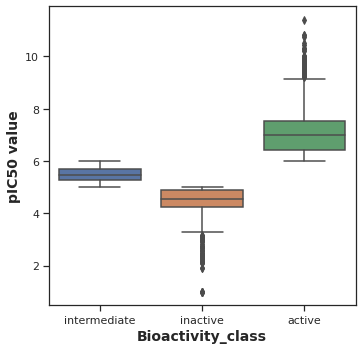

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_final)

plt.xlabel('Bioactivity_class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

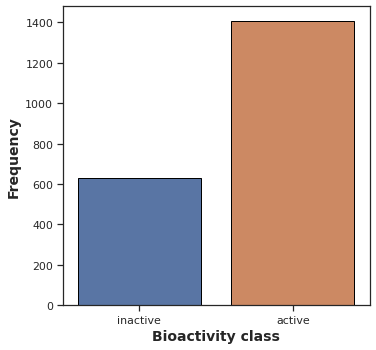

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

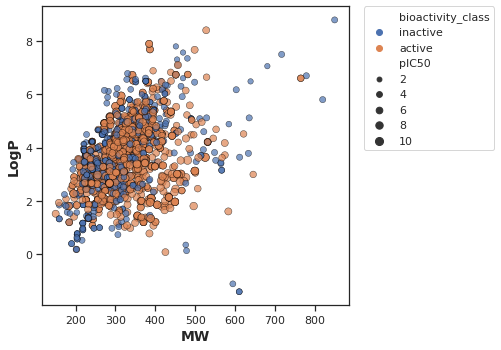

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('MW vs LogP.pdf')

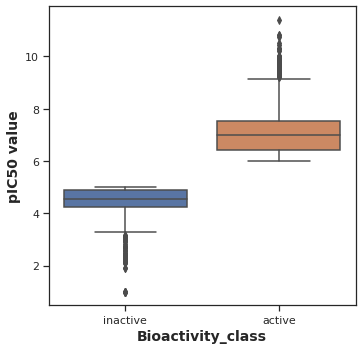

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity_class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

PaDEL Descriptor

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-03-24 13:12:58--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-03-24 13:12:58--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip.3’

padel.zip.3         100%[===================>]  24.57M   100MB/s    in 0.2s    

2023-03-24 13:12:59 (100 MB/s) - ‘padel.zip.3’ saved [25768637/25768637]

--2023-03-24 13:12:59--  https://gi

In [ ]:
! unzip padel.zip

Archive:  padel.zip
replace __MACOSX/._PaDEL-Descriptor? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config 

In [ ]:
df9 = pd.read_csv('bioactivity_data_preprocessed_2class_pIC50.csv')
df9

,Unnamed: 0,molecule_chembl_id,bioactivity_class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,1,CHEMBL2111947,inactive,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,315.501,3.89810,2.0,2.0,4.301030
1,2,CHEMBL431859,active,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,412.306,5.70542,0.0,3.0,6.623423
2,3,CHEMBL113637,active,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,319.383,4.63450,0.0,3.0,7.244125
3,4,CHEMBL112021,active,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,321.811,4.58780,0.0,3.0,7.267606
4,6,CHEMBL41761,active,CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21,319.383,4.63450,0.0,3.0,7.387216
...,...,...,...,...,...,...,...,...,...
2033,2843,CHEMBL5092560,active,CCC(CCc1cccnc1)=C(c1ccc(O)cc1)c1ccc(O)cc1,345.442,5.33750,2.0,3.0,6.045757
2034,2845,CHEMBL5074047,active,CCC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,334.419,4.66560,3.0,3.0,7.283997
2035,2846,CHEMBL5081446,active,CC(CCc1c[nH]cn1)=C(c1ccc(O)cc1)c1ccc(O)cc1,320.392,4.27550,3.0,3.0,7.200659
2036,2847,CHEMBL1093458,inactive,CC/C(=C(\c1ccc(O)cc1)c1ccc(OCCNC)cc1)c1ccccc1,373.496,5.35950,2.0,3.0,5.000000


In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
df9_selection = df9[selection]
df9_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat molecule.smi | wc -l

2038


In [ ]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh

Processing CHEMBL2111947 in molecule.smi (1/2038). 
Processing CHEMBL431859 in molecule.smi (2/2038). 
Processing CHEMBL113637 in molecule.smi (3/2038). Average speed: 4.58 s/mol.
Processing CHEMBL112021 in molecule.smi (4/2038). Average speed: 2.81 s/mol.
Processing CHEMBL41761 in molecule.smi (5/2038). Average speed: 1.93 s/mol.
Processing CHEMBL111868 in molecule.smi (6/2038). Average speed: 2.41 s/mol.
Processing CHEMBL111888 in molecule.smi (7/2038). Average speed: 1.87 s/mol.
Processing CHEMBL112074 in molecule.smi (8/2038). Average speed: 1.48 s/mol.
Processing CHEMBL324326 in molecule.smi (9/2038). Average speed: 1.53 s/mol.
Processing CHEMBL353068 in molecule.smi (10/2038). Average speed: 1.45 s/mol.
Processing CHEMBL166709 in molecule.smi (11/2038). Average speed: 1.16 s/mol.
Processing CHEMBL424556 in molecule.smi (12/2038). Average speed: 1.12 s/mol.
Processing CHEMBL1630261 in molecule.smi (13/2038). Average speed: 1.02 s/mol.
Processing CHEMBL169251 in molecule.smi (14/20

In [ ]:
df9_X = pd.read_csv('descriptors_output.csv')

In [ ]:
df9_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL431859,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL2111947,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL113637,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL112021,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL41761,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,CHEMBL5092560,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2034,CHEMBL5074047,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2035,CHEMBL5081446,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2036,CHEMBL1093458,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df9_X = df9_X.drop(columns=['Name'])
df9_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2034,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2035,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2036,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df9_Y = df9['pIC50']
df9_Y

0       4.301030
1       6.623423
2       7.244125
3       7.267606
4       7.387216
          ...   
2033    6.045757
2034    7.283997
2035    7.200659
2036    5.000000
2037    8.397940
Name: pIC50, Length: 2038, dtype: float64

In [ ]:
dataset9 = pd.concat([df9_X,df9_Y], axis=1)
dataset9

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.623423
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.244125
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.267606
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.387216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.045757
2034,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.283997
2035,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.200659
2036,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000


In [ ]:
dataset9.to_csv('bioactivity_data_preprocessed_2class_pIC50_pubchem_fp.csv', index=False)

Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df10 = pd.read_csv('bioactivity_data_preprocessed_2class_pIC50_pubchem_fp.csv')

In [ ]:
X = df10.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2034,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2035,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2036,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = df10.pIC50
Y

0       4.301030
1       6.623423
2       7.244125
3       7.267606
4       7.387216
          ...   
2033    6.045757
2034    7.283997
2035    7.200659
2036    5.000000
2037    8.397940
Name: pIC50, Length: 2038, dtype: float64

In [ ]:
X.shape

(2038, 881)

In [ ]:
Y.shape

(2038,)

In [ ]:
def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP33,PubchemFP143,...,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP803,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP860
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,1,1,0,0,1,0,0,0,1,...,1,1,0,1,0,0,1,0,0,1
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,1,1,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2034,1,1,1,1,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2035,1,1,1,1,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2036,1,1,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
X.shape

(2038, 238)

In [ ]:
X.to_csv("descriptor_list.csv", index = False)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((1630, 238), (1630,))

In [ ]:
X_test.shape, Y_test.shape

((408, 238), (408,))

In [ ]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X_test, Y_test)
r2

0.7578421067944889

In [ ]:
Y_pred = model.predict(X_test)
Y_pred

array([ 5.02751531,  7.53017299,  8.28752555,  3.9137627 ,  6.79173926,
        4.83202491,  6.13754826,  7.38303259,  7.05144436,  6.49074641,
        6.41444574,  6.62729822,  6.6516211 ,  8.28752492,  4.31675216,
        6.16236885,  5.72513111,  9.10078916,  7.93903644,  6.58345789,
        6.28340665,  6.35828459,  4.23513766,  7.94974806,  3.87783206,
        6.21585435,  7.22731174,  8.28752555,  4.28029623,  6.35251254,
        3.87783206,  7.00170847,  4.6656205 ,  6.64088397,  4.71077303,
        5.30037409,  4.49341626,  6.30215481,  7.67068252,  4.64522131,
        6.35680779,  6.89666455,  9.42339788,  4.23687189,  7.33542519,
        7.93903644,  6.8010971 ,  4.40993611,  6.63575466,  7.67288671,
        4.69980711,  6.31538473,  5.19787074,  6.16386007,  8.28752492,
        3.78603285,  7.38303259,  4.64478941,  5.29116379,  6.63343902,
        4.38810731,  7.34153024,  6.76667583,  6.92969013,  6.22289343,
        5.34014014,  3.87783206,  7.16606447,  6.40472376,  7.44

In [ ]:
pip install seaborn==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

TypeError: ignored

In [ ]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Mean squared error (MSE): 0.58
Coefficient of determination (R^2): 0.76


In [ ]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [ ]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

In [ ]:
predictions_train

In [ ]:
predictions_test

In [ ]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

In [ ]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

In [ ]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

In [ ]:
from sklearn import svm
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, Y)
r2 = regressor.score(X_test, Y_test)
r2

Save Model

In [ ]:
import pickle
pickle.dump(model, open('aromatase_model.pkl', 'wb'))